In [1]:
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
train = pd.read_csv('/content/drive/MyDrive/Data/Insurance_files/aug_train.csv')

print("Training Data")
print(train.shape)
print(train.head())


Training Data
(382154, 12)
       id  Gender  Age  ...  Policy_Sales_Channel  Vintage  Response
0  167647    Male   22  ...                 152.0       16         0
1   17163    Male   42  ...                  26.0      135         0
2   32023  Female   66  ...                 124.0      253         0
3   87447  Female   22  ...                 152.0       69         0
4  501933    Male   28  ...                 152.0      211         0

[5 rows x 12 columns]


In [4]:
test = pd.read_csv('/content/drive/MyDrive/Data/Insurance_files/aug_test.csv')
print("Test Data")
print(test.shape)
print(test.head())

Test Data
(78273, 11)
       id  Gender  Age  ...  Annual_Premium  Policy_Sales_Channel  Vintage
0   57782  Female   34  ...         38244.0                 124.0      146
1  286811  Female   55  ...         37577.0                 122.0      109
2  117823    Male   39  ...         24578.0                  26.0       63
3  213992    Male   28  ...         40507.0                   8.0      129
4  324756  Female   24  ...         36783.0                 152.0      201

[5 rows x 11 columns]


In [5]:

data = np.load('/content/drive/MyDrive/Data/Insurance_files/answer.npy')
data

array([0, 0, 0, ..., 0, 0, 0])

In [6]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [15]:
#raw_df[['Time',  'V1', 'V2', 'V3', 'V4', 'V5', 'V26', 'V27', 'V28', 'Amount', 'Class']].describe()
train[['id',  'Gender', 'Age',  'Driving_License',  'Region_Code',  'Previously_Insured', 'Vehicle_Age',  'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel','Vintage','Response']].describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000
mean,234392.953477,38.545691,0.998108,26.406867,0.489182,30711.271362,111.939812,154.189429,0.163811
std,139527.487326,15.226897,0.043455,13.181241,0.499884,17061.595532,54.286511,83.735107,0.370104
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,115006.250000,25.000000,1.000000,15.000000,0.000000,24546.000000,26.000000,81.000000,0.000000
50%,230461.500000,36.000000,1.000000,28.000000,0.000000,31692.000000,145.000000,154.000000,0.000000
75%,345434.750000,49.000000,1.000000,35.000000,1.000000,39447.750000,152.000000,227.000000,0.000000
max,508145.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [8]:
test[['id',  'Gender', 'Age',  'Driving_License',  'Region_Code',  'Previously_Insured', 'Vehicle_Age',  'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel','Vintage']].describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage
count,78273.000000,78273.000000,78273.000000,78273.000000,78273.000000,78273.000000,78273.000000,78273.000000
mean,233993.913827,38.507570,0.997866,26.381434,0.488917,30707.042441,111.993216,154.827220
std,139265.743227,15.216589,0.046141,13.149780,0.499880,17044.185877,54.270018,83.476632
min,2.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000
25%,115579.000000,25.000000,1.000000,15.000000,0.000000,24548.000000,26.000000,83.000000
50%,229110.000000,36.000000,1.000000,28.000000,0.000000,31741.000000,150.000000,155.000000
75%,344739.000000,49.000000,1.000000,35.000000,1.000000,39476.000000,152.000000,227.000000
max,508136.000000,85.000000,1.000000,52.000000,1.000000,489663.000000,163.000000,299.000000


In [9]:
#The result shows it is a imbalance data set
train.Response.value_counts()


0    319553
1     62601
Name: Response, dtype: int64

In [10]:
#check if it is a imbalance dataset
no, yes = np.bincount(train['Response'])
total = no + yes
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, yes, 100 * yes / total))

Examples:
    Total: 382154
    Positive: 62601 (16.38% of total)



In [17]:
target = train.pop('Response')

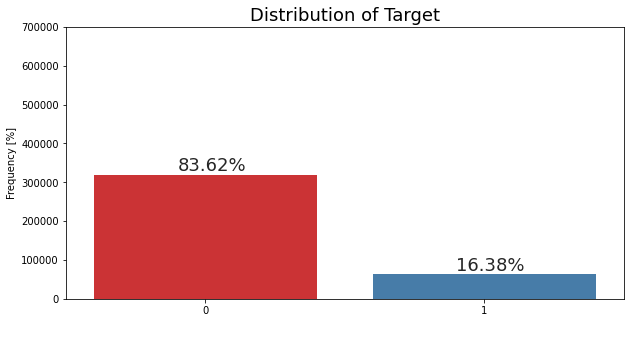

In [12]:

ax = sns.countplot(x = target ,palette="Set1")
sns.set(font_scale=1.5)
ax.set_xlabel(' ')
ax.set_ylabel(' ')
fig = plt.gcf()
fig.set_size_inches(10,5)
ax.set_ylim(top=700000)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100*p.get_height()/len(target)), (p.get_x()+ 0.3, p.get_height()+10000))

plt.title('Distribution of Target')

plt.ylabel('Frequency [%]')
plt.show()


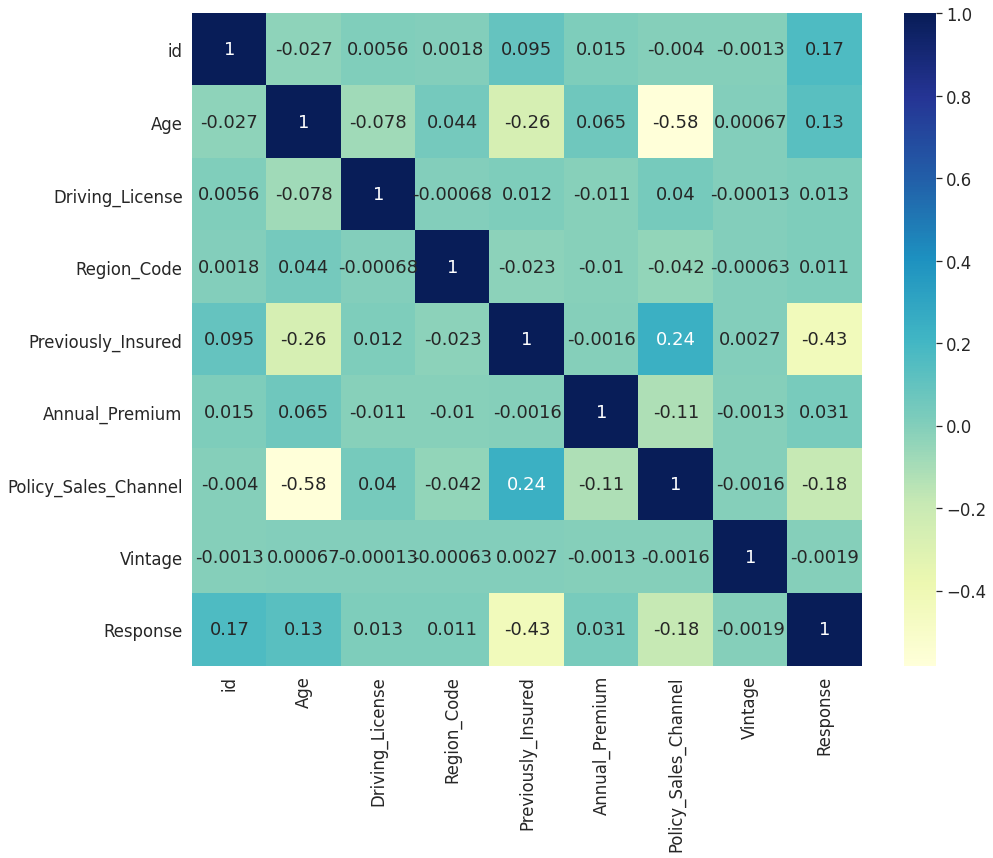

In [19]:
plt.figure(figsize=(15, 12))
sns.heatmap(pd.concat([train, target], axis=1).corr(),annot=True , cmap='YlGnBu') 

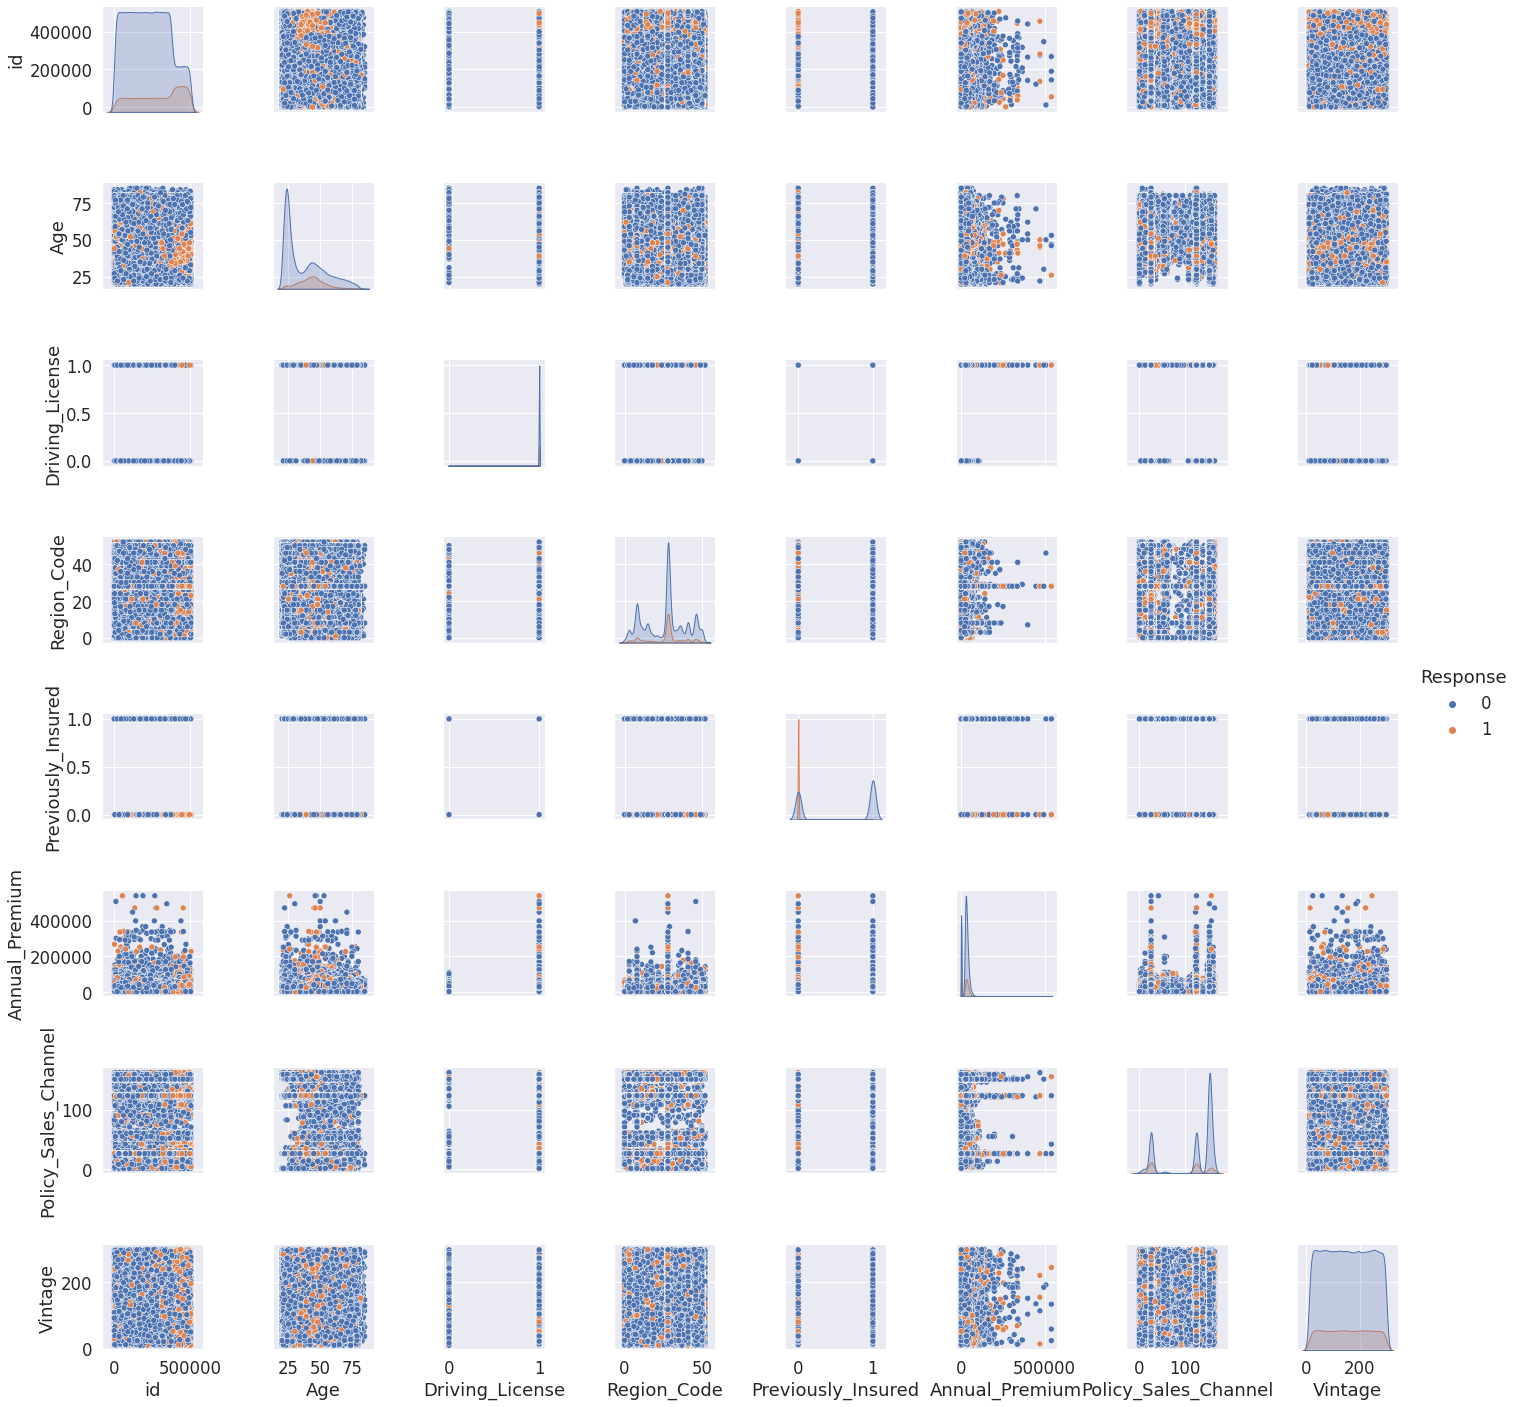

In [16]:
#Visualization
sns.pairplot(train,hue='Response')

In [8]:
#Check for null values
print('Missing data in Train')
print(train.isna().any())
print('Missing data in Test')
print(test.isna().any())


Missing data in Train
id                      False
Gender                  False
Age                     False
Driving_License         False
Region_Code             False
Previously_Insured      False
Vehicle_Age             False
Vehicle_Damage          False
Annual_Premium          False
Policy_Sales_Channel    False
Vintage                 False
Response                False
dtype: bool
Missing data in Test
id                      False
Gender                  False
Age                     False
Driving_License         False
Region_Code             False
Previously_Insured      False
Vehicle_Age             False
Vehicle_Damage          False
Annual_Premium          False
Policy_Sales_Channel    False
Vintage                 False
dtype: bool


In [9]:
#check for data types
train.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [10]:
#Find the category and numeric - Convert the object to category variables.
cat=[]
for c in train.columns:
  if train[c].dtypes == 'object':
    cat.append(c)
print(cat)

num=[]
for c in train.columns:
  if c not in cat:
    num.append(c)
print(num)



['Gender', 'Vehicle_Age', 'Vehicle_Damage']
['id', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response']


In [11]:
#Change the type from numeric
cat_ftrs = ['Region_Code','Previously_Insured', 'Policy_Sales_Channel', 'Vintage']
for col in cat_ftrs:
    train[col]=train[col].astype('object')

In [12]:
train.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code              object
Previously_Insured       object
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel     object
Vintage                  object
Response                  int64
dtype: object

In [13]:
train = pd.get_dummies(train,drop_first=True)

In [14]:
train.dtypes

id                   int64
Age                  int64
Driving_License      int64
Annual_Premium     float64
Response             int64
                    ...   
Vintage_295          uint8
Vintage_296          uint8
Vintage_297          uint8
Vintage_298          uint8
Vintage_299          uint8
Length: 506, dtype: object

In [27]:
test = pd.get_dummies(test,drop_first=True)
test.dtypes

id                         int64
Age                        int64
Driving_License            int64
Region_Code              float64
Previously_Insured         int64
Annual_Premium           float64
Policy_Sales_Channel     float64
Vintage                    int64
Gender_Male                uint8
Vehicle_Age_< 1 Year       uint8
Vehicle_Age_> 2 Years      uint8
Vehicle_Damage_Yes         uint8
dtype: object

In [28]:

tr_id = train.pop('id')
te_id = test.pop('id')

In [15]:
train_copy = train.copy()

In [31]:
#Remove the response
res = train.pop('Response')

In [16]:
train.shape , test.shape

((382154, 506), (78273, 11))

In [17]:
driving_lic = train.pop('Driving_License')

In [18]:
train.shape

(382154, 505)

In [19]:
# Use a utility from sklearn to split and shuffle our dataset.
train_df, test_df = train_test_split(train, test_size=0.2)
train_df, val_df = train_test_split(train_df, test_size=0.2)

# Form np arrays of labels and features.
train_labels = np.array(train_df.pop('Response'))
bool_train_labels = train_labels != 0
val_labels = np.array(val_df.pop('Response'))
test_labels = np.array(test_df.pop('Response'))

train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

In [20]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)


print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)


Training labels shape: (244578,)
Validation labels shape: (61145,)
Test labels shape: (76431,)
Training features shape: (244578, 504)
Validation features shape: (61145, 504)
Test features shape: (76431, 504)


In [21]:
pos_df = pd.DataFrame(train_features[ bool_train_labels], columns=train_df.columns)
neg_df = pd.DataFrame(train_features[~bool_train_labels], columns=train_df.columns)



In [22]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

def make_model(metrics=METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = keras.Sequential([
      keras.layers.Dense(
          16, activation='relu',
          input_shape=(train_features.shape[-1],)),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])

  model.compile(
      optimizer=keras.optimizers.Adam(lr=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

In [23]:
EPOCHS = 100
BATCH_SIZE = 2048

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

In [24]:
model = make_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                8080      
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 8,097
Trainable params: 8,097
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.predict(train_features[:10])

array([[0.5283664 ],
       [0.5671788 ],
       [0.73291254],
       [0.6205657 ],
       [0.56482   ],
       [0.60029435],
       [0.45562306],
       [0.5330248 ],
       [0.46343708],
       [0.5362354 ]], dtype=float32)

In [26]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.8000


In [27]:
initial_bias = np.log([pos/neg])
initial_bias

array([-1.63014189])

In [28]:
model = make_model(output_bias=initial_bias)
model.predict(train_features[:10])

array([[0.29091233],
       [0.21990815],
       [0.25826627],
       [0.3056766 ],
       [0.19767347],
       [0.29821953],
       [0.22812748],
       [0.26139218],
       [0.1415829 ],
       [0.20414889]], dtype=float32)

In [29]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.4818


In [30]:
initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')
model.save_weights(initial_weights)

In [31]:
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [32]:
model = make_model()
model.load_weights(initial_weights)
careful_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [33]:
def plot_loss(history, label, n):
  # Use a log scale on y-axis to show the wide range of values.
  plt.semilogy(history.epoch, history.history['loss'],
               color=colors[n], label='Train ' + label)
  plt.semilogy(history.epoch, history.history['val_loss'],
               color=colors[n], label='Val ' + label,
               linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')

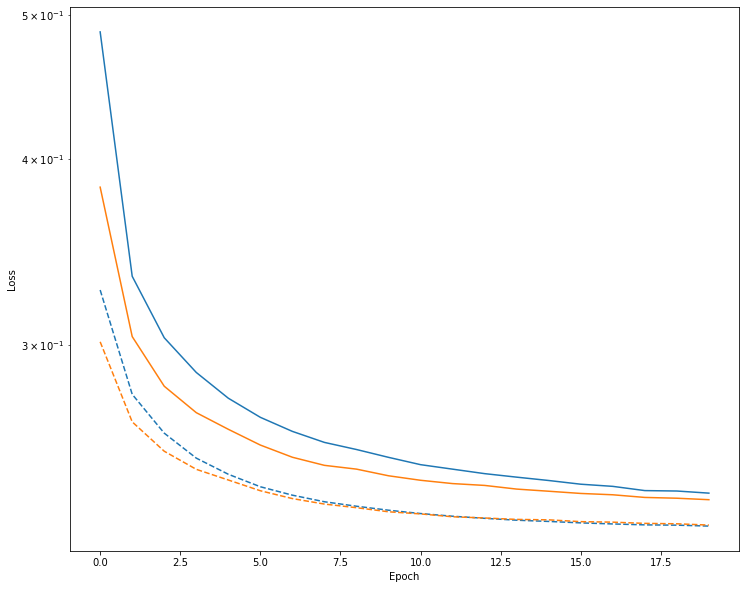

In [34]:
plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 1)

In [35]:
model = make_model()
model.load_weights(initial_weights)
baseline_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels))

Epoch 1/100
120/120 [==============================] - 5s 25ms/step - loss: 0.4221 - tp: 5008.0083 - fp: 1285.5207 - tn: 154331.4711 - fn: 25411.5372 - accuracy: 0.8599 - precision: 0.8115 - recall: 0.1831 - auc: 0.8034 - val_loss: 0.3022 - val_tp: 2069.0000 - val_fp: 381.0000 - val_tn: 50790.0000 - val_fn: 7905.0000 - val_accuracy: 0.8645 - val_precision: 0.8445 - val_recall: 0.2074 - val_auc: 0.8903
Epoch 2/100
120/120 [==============================] - 2s 17ms/step - loss: 0.3127 - tp: 6165.3471 - fp: 3100.8099 - tn: 101316.0579 - fn: 14309.3223 - accuracy: 0.8591 - precision: 0.6610 - recall: 0.2913 - auc: 0.8687 - val_loss: 0.2675 - val_tp: 4178.0000 - val_fp: 1062.0000 - val_tn: 50109.0000 - val_fn: 5796.0000 - val_accuracy: 0.8878 - val_precision: 0.7973 - val_recall: 0.4189 - val_auc: 0.9092
Epoch 3/100
120/120 [==============================] - 2s 17ms/step - loss: 0.2857 - tp: 7665.1736 - fp: 3375.0331 - tn: 101020.1405 - fn: 12831.1901 - accuracy: 0.8694 - precision: 0.6936 

In [36]:
def plot_metrics(history):
  metrics = ['loss', 'auc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()

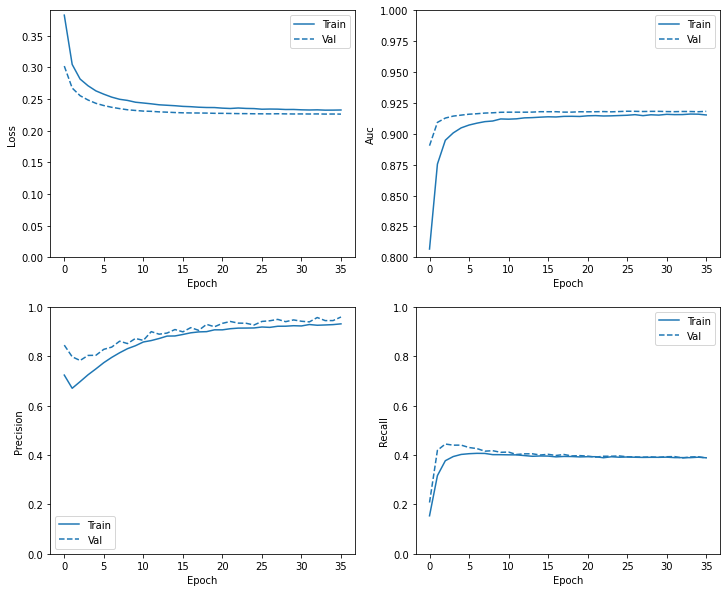

In [37]:
plot_metrics(baseline_history)

In [38]:
train_predictions_baseline = model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(test_features, batch_size=BATCH_SIZE)

In [39]:
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
  print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
  print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
  print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
  print('Total Fraudulent Transactions: ', np.sum(cm[1]))

loss :  0.22909700870513916
tp :  4900.0
fp :  325.0
tn :  63579.0
fn :  7627.0
accuracy :  0.895958423614502
precision :  0.9377990365028381
recall :  0.39115509390830994
auc :  0.9157869815826416

Legitimate Transactions Detected (True Negatives):  63579
Legitimate Transactions Incorrectly Detected (False Positives):  325
Fraudulent Transactions Missed (False Negatives):  7627
Fraudulent Transactions Detected (True Positives):  4900
Total Fraudulent Transactions:  12527


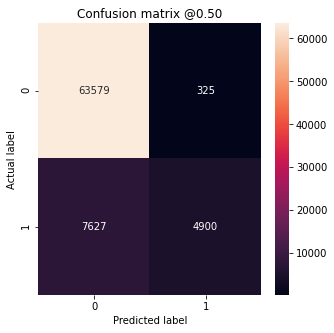

In [40]:
baseline_results = model.evaluate(test_features, test_labels,
                                  batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_baseline)

In [41]:
def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

  plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.xlim([-0.5,20])
  plt.ylim([80,100.5])
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')

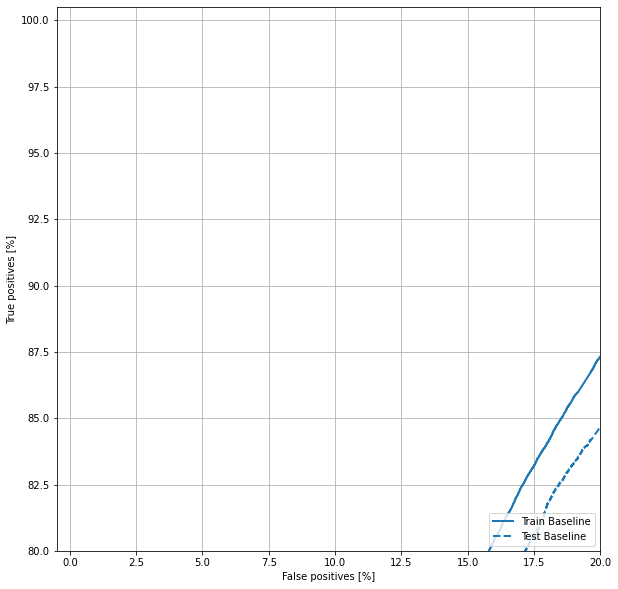

In [42]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

In [43]:
# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
weight_for_0 = (1 / neg)*(total)/2.0 
weight_for_1 = (1 / pos)*(total)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.60
Weight for class 1: 3.05


In [44]:
weighted_model = make_model()
weighted_model.load_weights(initial_weights)

weighted_history = weighted_model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels),
    # The class weights go here
    class_weight=class_weight) 

Epoch 1/100
120/120 [==============================] - 5s 28ms/step - loss: 0.7200 - tp: 14008.6777 - fp: 21939.5372 - tn: 146394.6446 - fn: 18979.6777 - accuracy: 0.8085 - precision: 0.4630 - recall: 0.4012 - auc: 0.7736 - val_loss: 0.4623 - val_tp: 8627.0000 - val_fp: 12666.0000 - val_tn: 38505.0000 - val_fn: 1347.0000 - val_accuracy: 0.7708 - val_precision: 0.4052 - val_recall: 0.8649 - val_auc: 0.8830
Epoch 2/100
120/120 [==============================] - 2s 17ms/step - loss: 0.4841 - tp: 15388.1570 - fp: 22822.9421 - tn: 81584.6942 - fn: 5095.7438 - accuracy: 0.7737 - precision: 0.3986 - recall: 0.7450 - auc: 0.8493 - val_loss: 0.3944 - val_tp: 8902.0000 - val_fp: 11981.0000 - val_tn: 39190.0000 - val_fn: 1072.0000 - val_accuracy: 0.7865 - val_precision: 0.4263 - val_recall: 0.8925 - val_auc: 0.9081
Epoch 3/100
120/120 [==============================] - 2s 17ms/step - loss: 0.4271 - tp: 16302.5372 - fp: 22245.3306 - tn: 82237.1488 - fn: 4106.5207 - accuracy: 0.7883 - precision: 0.

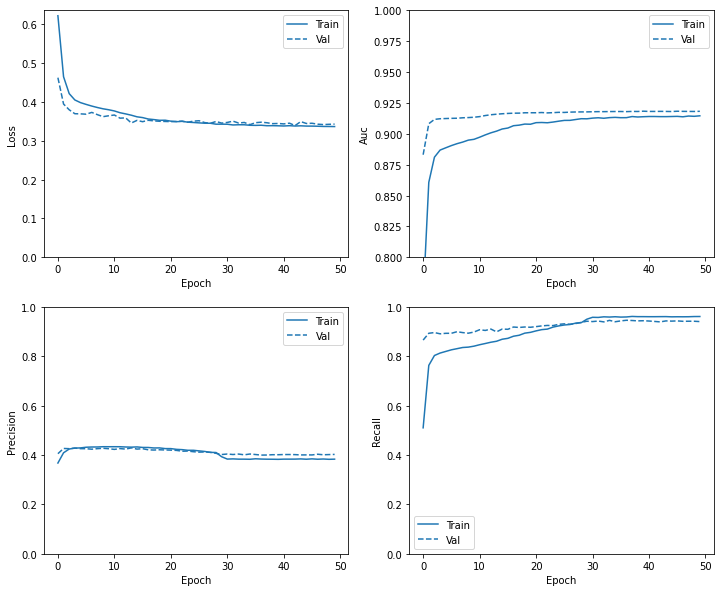

In [45]:
plot_metrics(weighted_history)

In [46]:
train_predictions_weighted = weighted_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_weighted = weighted_model.predict(test_features, batch_size=BATCH_SIZE)

loss :  0.3494153916835785
tp :  11737.0
fp :  17734.0
tn :  46170.0
fn :  790.0
accuracy :  0.757637619972229
precision :  0.3982559144496918
recall :  0.9369361996650696
auc :  0.9150261878967285

Legitimate Transactions Detected (True Negatives):  46170
Legitimate Transactions Incorrectly Detected (False Positives):  17734
Fraudulent Transactions Missed (False Negatives):  790
Fraudulent Transactions Detected (True Positives):  11737
Total Fraudulent Transactions:  12527


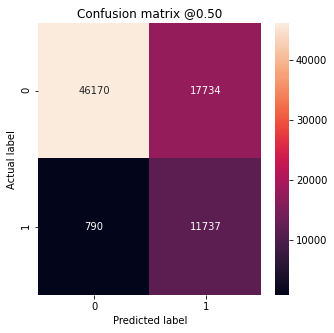

In [47]:
weighted_results = weighted_model.evaluate(test_features, test_labels,
                                           batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(weighted_model.metrics_names, weighted_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_weighted)

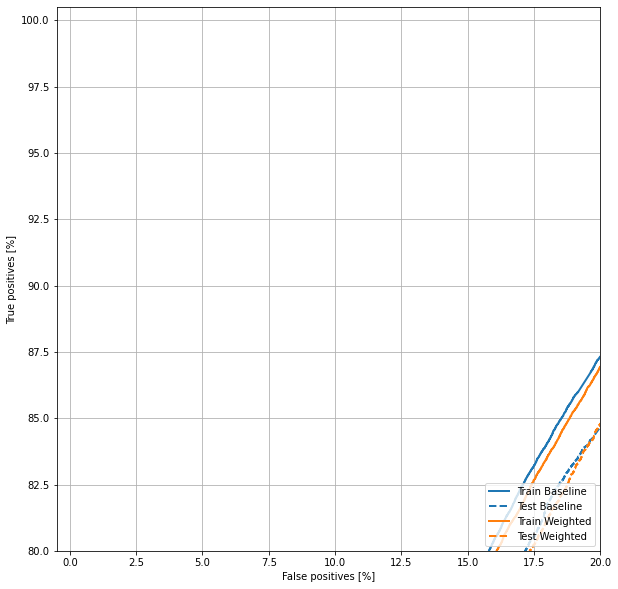

In [48]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')


plt.legend(loc='lower right')

In [50]:
pos_features = train_features[bool_train_labels]
neg_features = train_features[~bool_train_labels]

pos_labels = train_labels[bool_train_labels]
neg_labels = train_labels[~bool_train_labels]

In [51]:
BUFFER_SIZE = 100000

def make_ds(features, labels):
  ds = tf.data.Dataset.from_tensor_slices((features, labels))#.cache()
  ds = ds.shuffle(BUFFER_SIZE).repeat()
  return ds

pos_ds = make_ds(pos_features, pos_labels)
neg_ds = make_ds(neg_features, neg_labels)

In [52]:
for features, label in pos_ds.take(1):
  print("Features:\n", features.numpy())
  print()
  print("Label: ", label.numpy())

Features:
 [ 7.60421258e-02 -8.88929929e-01  2.82796380e-01 -1.07828740e+00
 -4.98386556e-02 -1.00113295e-01 -1.56978415e-01 -6.95981199e-02
 -5.60514493e-02 -1.32790635e-01 -9.39963908e-02 -3.11153394e-01
 -8.82248509e-02 -1.10189965e-01 -1.59705278e-01 -9.09379437e-02
 -1.03475537e-01 -1.15103516e-01 -1.88101756e-01 -7.15004529e-02
 -8.19606135e-02 -1.20491173e-01 -6.20810984e-02 -6.68766125e-02
 -1.07088367e-01 -5.77510119e-02 -7.23904640e-02 -7.88965932e-02
 -8.06870202e-02 -7.97577721e-02 -8.17074413e-02  1.60454107e+00
 -1.78705053e-01 -1.85322721e-01 -6.70614188e-02 -8.40579624e-02
 -1.46486870e-01 -6.38160140e-02 -1.39656870e-01 -1.52026411e-01
 -1.15649327e-01 -7.31569951e-02 -1.08736367e-01 -5.69617037e-02
 -2.29495700e-01 -3.90820324e-02 -8.27406556e-02 -4.50333063e-02
 -1.21655885e-01 -2.36131740e-01 -1.39626437e-01 -1.06951570e-01
 -6.57256973e-02 -1.65441896e-01 -2.23398146e-02 -2.70630539e-02
 -9.80074023e-01  1.13769623e+00 -2.05887797e-01  1.04020611e+00
 -2.85961837e-

In [53]:
resampled_ds = tf.data.experimental.sample_from_datasets([pos_ds, neg_ds], weights=[0.5, 0.5])
resampled_ds = resampled_ds.batch(BATCH_SIZE).prefetch(2)

In [54]:
for features, label in resampled_ds.take(1):
  print(label.numpy().mean())

0.50146484375


In [55]:
resampled_steps_per_epoch = np.ceil(2.0*neg/BATCH_SIZE)
resampled_steps_per_epoch

313.0

In [56]:
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1] 
output_layer.bias.assign([0])

val_ds = tf.data.Dataset.from_tensor_slices((val_features, val_labels)).cache()
val_ds = val_ds.batch(BATCH_SIZE).prefetch(2) 

resampled_history = resampled_model.fit(
    resampled_ds,
    epochs=EPOCHS,
    steps_per_epoch=resampled_steps_per_epoch,
    callbacks=[early_stopping],
    validation_data=val_ds)

Epoch 1/100
313/313 [==============================] - 20s 53ms/step - loss: 0.5631 - tp: 139620.0382 - fp: 69865.8312 - tn: 155403.9108 - fn: 34094.6975 - accuracy: 0.7264 - precision: 0.6294 - recall: 0.7937 - auc: 0.8181 - val_loss: 0.3754 - val_tp: 9092.0000 - val_fp: 12414.0000 - val_tn: 38757.0000 - val_fn: 882.0000 - val_accuracy: 0.7825 - val_precision: 0.4228 - val_recall: 0.9116 - val_auc: 0.9134
Epoch 2/100
313/313 [==============================] - 12s 39ms/step - loss: 0.3795 - tp: 144754.9809 - fp: 39693.0764 - tn: 121334.7834 - fn: 16770.6369 - accuracy: 0.8239 - precision: 0.7846 - recall: 0.8937 - auc: 0.8997 - val_loss: 0.3538 - val_tp: 9252.0000 - val_fp: 13048.0000 - val_tn: 38123.0000 - val_fn: 722.0000 - val_accuracy: 0.7748 - val_precision: 0.4149 - val_recall: 0.9276 - val_auc: 0.9157
Epoch 3/100
313/313 [==============================] - 12s 38ms/step - loss: 0.3595 - tp: 149968.8025 - fp: 43921.2166 - tn: 117524.4268 - fn: 11139.0318 - accuracy: 0.8292 - preci

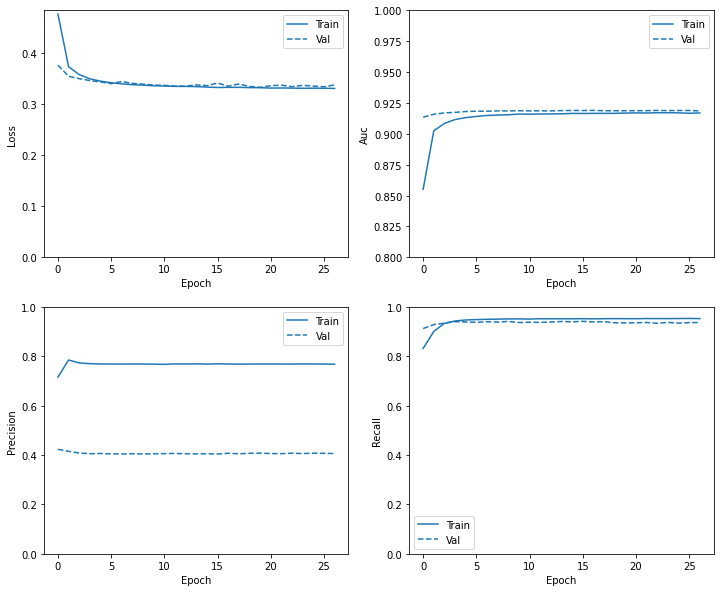

In [57]:
plot_metrics(resampled_history)

In [58]:
train_predictions_resampled = resampled_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_resampled = resampled_model.predict(test_features, batch_size=BATCH_SIZE)

loss :  0.33769121766090393
tp :  11686.0
fp :  17293.0
tn :  46611.0
fn :  841.0
accuracy :  0.7627402544021606
precision :  0.4032575190067291
recall :  0.9328650236129761
auc :  0.9165491461753845

Legitimate Transactions Detected (True Negatives):  46611
Legitimate Transactions Incorrectly Detected (False Positives):  17293
Fraudulent Transactions Missed (False Negatives):  841
Fraudulent Transactions Detected (True Positives):  11686
Total Fraudulent Transactions:  12527


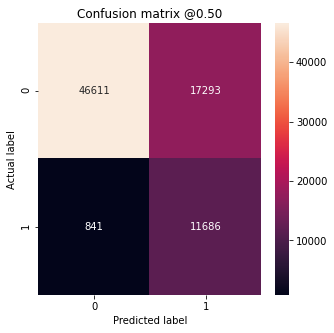

In [59]:
resampled_results = resampled_model.evaluate(test_features, test_labels,
                                             batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(resampled_model.metrics_names, resampled_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_resampled)

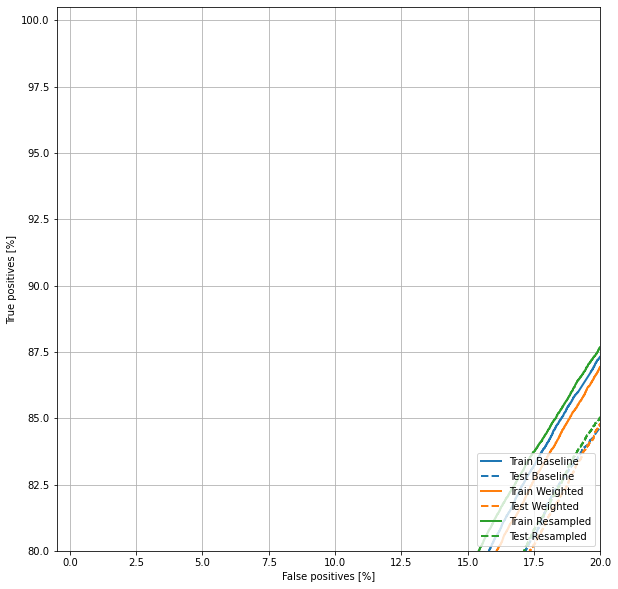

In [60]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')

plot_roc("Train Resampled", train_labels, train_predictions_resampled, color=colors[2])
plot_roc("Test Resampled", test_labels, test_predictions_resampled, color=colors[2], linestyle='--')
plt.legend(loc='lower right')